In [2]:
! pip install sweetviz


In [3]:
## Exploring the data
## Building graphs and looking at dependencies
# Importing all the required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import sweetviz as sv
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# Creating a dataframe for the taining data
df_train = pd.read_csv(r"D:\housing\train.csv")
ids = df_train['Id'].values


In [9]:
# Describing the data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# List of all the different columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
quantitative = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [12]:
# List of qualitative Data Types
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
# List of quantitative Data Types
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

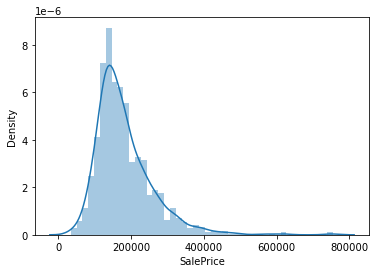

In [14]:
# Flexiblity Plot of the Sale Price
sns.distplot(df_train['SalePrice'])

In [15]:
## Relationship of Sale Price with Numerical Variables
important_features = ['LotArea', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 
                      '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt','YearRemodAdd', 'SalePrice']
DF = df_train[important_features]

#.......main plot (scatter)
fig = px.scatter(DF,x='GrLivArea',y='SalePrice',color='OverallQual',size='LotArea', width=750,height=400)

#......annotation (text)
fig.add_annotation(text="Possible outliers",xref="x", yref="y",x=6200,y=160000,showarrow = True,
                   yshift=30,xshift=-60,font=dict(family="sans serif",size=12,color="LightSeaGreen"))

#......annotation (box)
fig.add_shape(type="rect",xref="x", yref="y",x0=4500, x1=5800, y0=100000, y1=250000,
              fillcolor="lightgray", line_color="yellow",opacity=0.25)

#......update the plot as you wish
fig.update_layout(title='<b>House Price vs GrLivArea<b>',titlefont={'size': 24},template='plotly_dark')
fig.show()


In [16]:
#.......main plot (scatter)
fig = px.scatter(DF,x='TotalBsmtSF',y='SalePrice',color='OverallQual',size='LotArea',width=750,height=400)

#......annotation (text)
fig.add_annotation(text="Possible outlier",xref="x", yref="y",x=7000,y=160000,showarrow = True,
                   yshift=30,xshift=-60,font=dict(family="sans serif",size=12,color="LightSeaGreen"))

#......annotation (box)
fig.add_shape(type="rect",xref="x", yref="y",x0=5600, x1=6400, y0=100000, y1=250000,
              fillcolor="lightgray",line_color="yellow",opacity=0.25)

#......update the plot as you wish
fig.update_layout(title='<b>House Price vs TotalBsmtSF<b>',titlefont={'size': 24},template='plotly_dark')

fig.show()

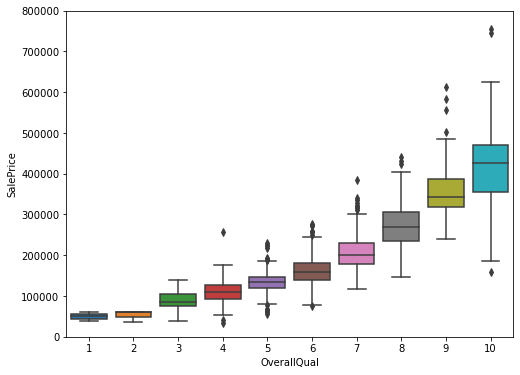

In [17]:
## Relationship of Sale Price with Relational Variables
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

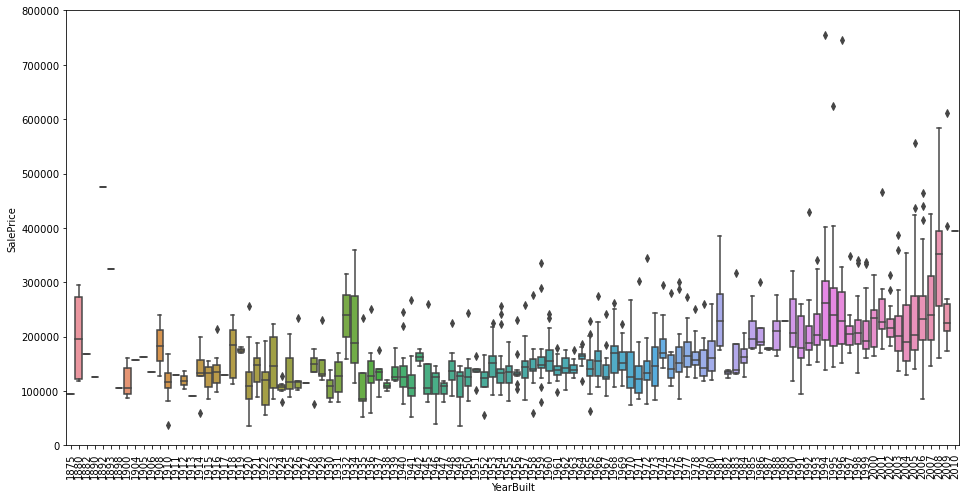

In [18]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## Conclusions Drawn
GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'

'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

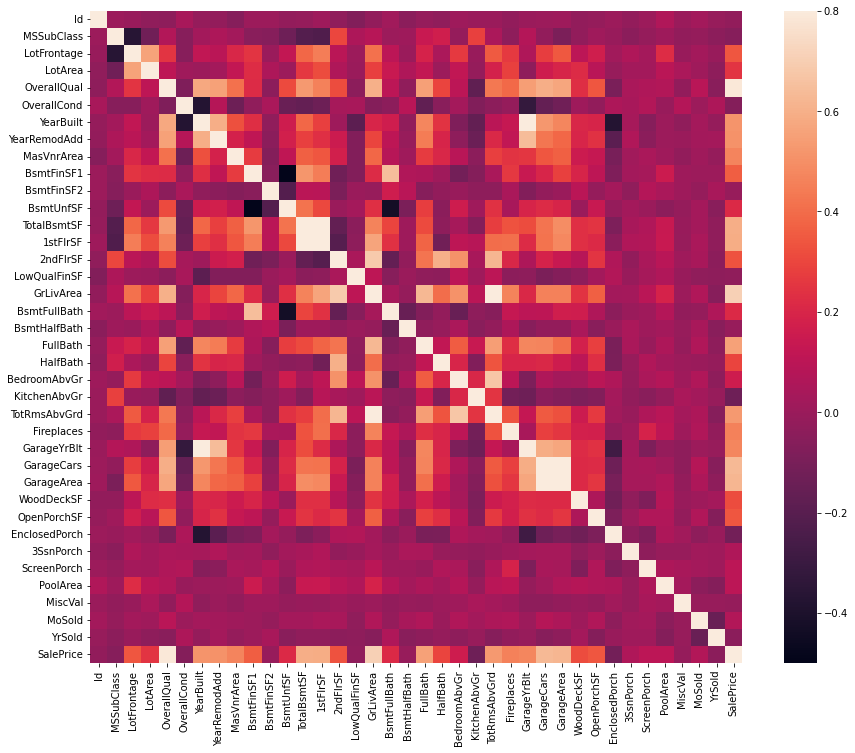

In [19]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

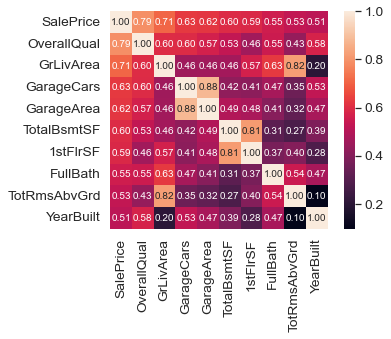

In [20]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Conclusion
'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'

'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers.

'TotRmsAbvGrd' and 'GrLivArea' are twin brothers again

'YearBuilt' is slightly correlated with 'SalePrice'

In [21]:
fig = make_subplots(rows=5, cols=2,specs=[[{}, {"rowspan": 2}],[{}, None],
                                          [{"rowspan": 2, "colspan": 2},None],[None, None],
                                          [{}, {}]],print_grid=True)

fig.add_trace(go.Bar(x=DF.groupby('TotRmsAbvGrd')['SalePrice'].mean().index,
                     y=DF.groupby('TotRmsAbvGrd')['SalePrice'].mean(),name="Total rooms above gr.",
                     marker_color='#a1a1a1'),row=1, col=1)
fig.add_trace(go.Scatter(x=DF['LotArea'], y=DF['SalePrice'], mode='markers', name="Lot area",
                         marker_color='lightblue'), row=1, col=2)
fig.add_trace(go.Bar(x=DF.groupby('OverallQual')['SalePrice'].mean().index,
                     y=DF.groupby('OverallQual')['SalePrice'].mean(), name="Overall quality", 
                     marker_color='lightsalmon'), row=2, col=1)
fig.add_trace(go.Scatter(x=DF['GrLivArea'], y=DF['SalePrice'], mode='markers',name="Gr living area",
                         marker_color='lightseagreen'), row=3, col=1)
fig.add_trace(go.Box(x=DF['GarageCars'],  y=DF['SalePrice'],marker_color='darkblue', name="Garage cars",
                     boxmean=True), row=5, col=1) 
fig.add_trace(go.Violin(x=DF['FullBath'],y=DF['SalePrice'],name="Full bath",box_visible=False,
                        line_color='black',meanline_visible=True, fillcolor='purple', opacity=0.6),row=5,col=2)
    
# Update xaxis properties
fig.update_xaxes(title_text="TotRmsAbvGrd",showgrid=False, row=1, col=1)
fig.update_xaxes(title_text="Lot area", showgrid=False, row=1, col=2)
fig.update_xaxes(title_text="Overall quality", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="Grd. living area", showgrid=False, row=3, col=1)
fig.update_xaxes(title_text="Garage cars", showgrid=False, row=5, col=1)
fig.update_xaxes(title_text="FullBath", showgrid=False, row=5, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="SalePrice",showgrid=False,row=1, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=1, col=2)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=2, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=3, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=5, col=1)
fig.update_yaxes(title_text="SalePrice", showgrid=False, row=5, col=2)

fig.update_layout(height=1050, width=750,showlegend=False,
                  title_text="<b>House Prices: Features highly correlated with SalePrice<b>",
                  titlefont={'size': 28, 'family':'Serif'},
                  paper_bgcolor="#ededed",plot_bgcolor='#ededed',)
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  ⎡ (1,2) x2,y2 ⎤
[ (2,1) x3,y3 ]  ⎣      :      ⎦
⎡ (3,1) x4,y4           -      ⎤
⎣      :                :      ⎦
[ (5,1) x5,y5 ]  [ (5,2) x6,y6 ]



In [18]:
### Missing Data
#missing data
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.400685
MiscFeature,96.232877
Alley,93.407534
Fence,79.708904
FireplaceQu,47.174658
LotFrontage,18.321918
GarageType,5.479452
GarageYrBlt,5.479452
GarageFinish,5.479452
GarageQual,5.479452


Text(0.5, 1.0, 'Percent missing data by feature')

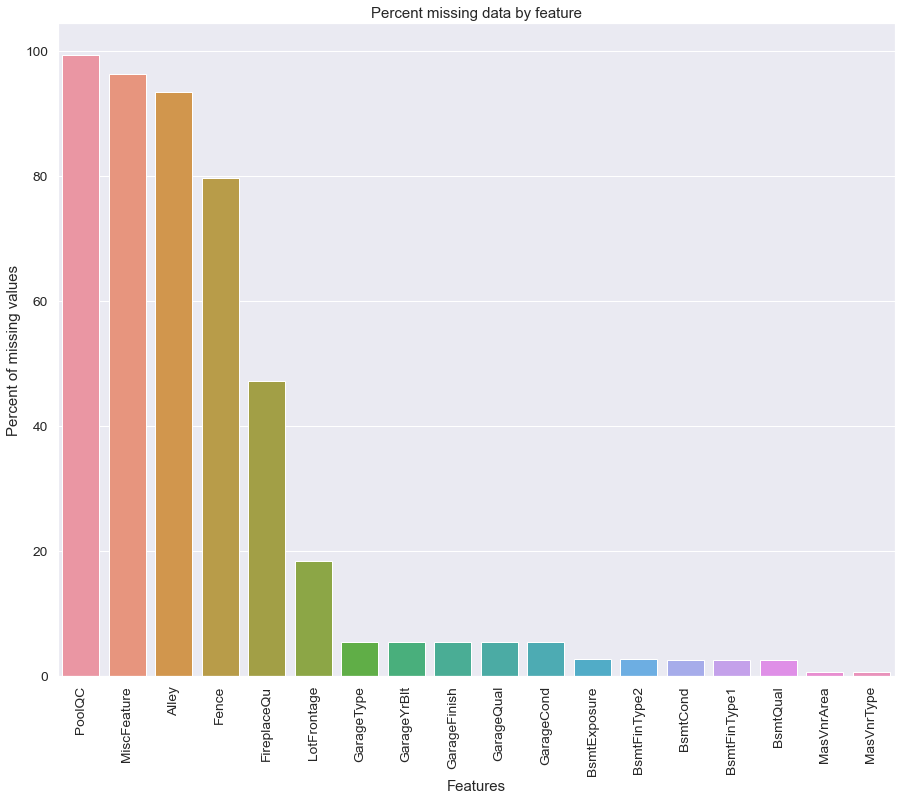

In [19]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_train_na.index, y=df_train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Simple Clustering


In [20]:
# Encoding Qualitaive Features
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in qualitative:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


0.7611192221945008


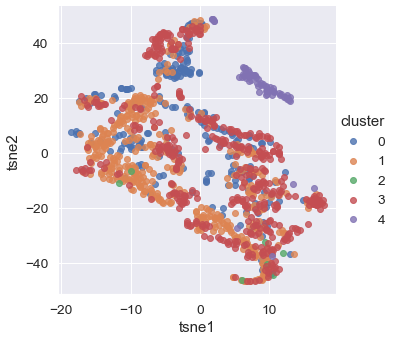

In [21]:
features = quantitative + qual_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = df_train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))


## Importing Data


In [22]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import sklearn.metrics as metrics
import math
from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')


In [23]:
all_data = pd.read_csv(r"D:\housing\train.csv")
all_data.shape



(1168, 81)

In [24]:
#Save the 'Id' column
train_ID = all_data['Id']
#Dropping the  'Id' column
all_data.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("The train data size after dropping Id feature is : {} ".format(all_data.shape)) 


The train data size after dropping Id feature is : (1168, 80) 


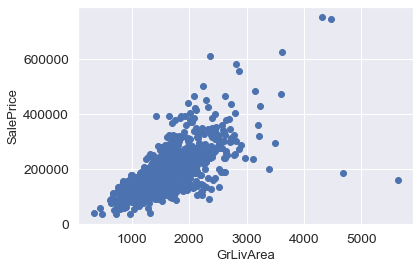

In [25]:
### Data Outliers
fig, ax = plt.subplots()
ax.scatter(x = all_data['GrLivArea'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

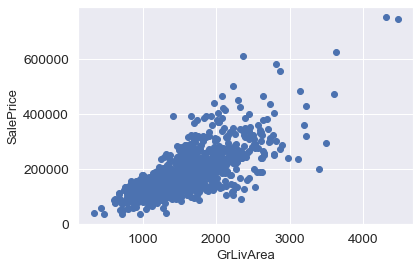

In [26]:
#Deleting outliers
all_data = all_data.drop(all_data[(all_data['GrLivArea']>4000) 
                         & (all_data['SalePrice']<300000)].index)

#Checking
fig, ax = plt.subplots()
ax.scatter(all_data['GrLivArea'], all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()



 mu = 181492.62 and sigma = 79136.94



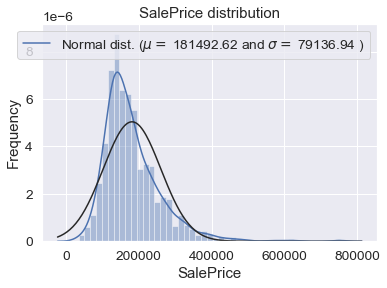

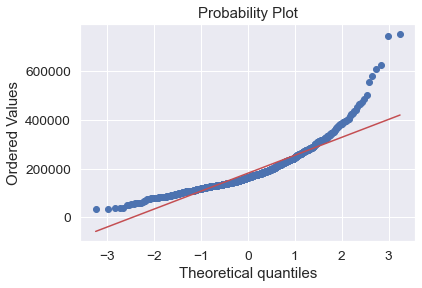

In [27]:
### Target Variable Analysis and Transformation
sns.distplot(all_data['SalePrice'] , fit=norm);

# The fitted parameters used by the function
(mu, sigma) = norm.fit(all_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# The distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
# The QQ-plot
fig = plt.figure()
res = stats.probplot(all_data['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. For linear models its better to have normally distributed data , so we to transform this variable and make it more normally distributed.




 mu = 12.03 and sigma = 0.40



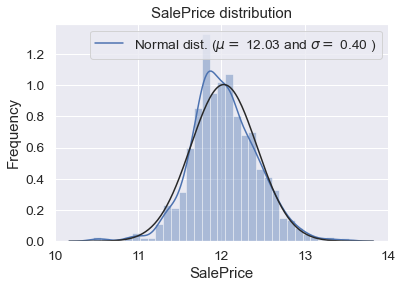

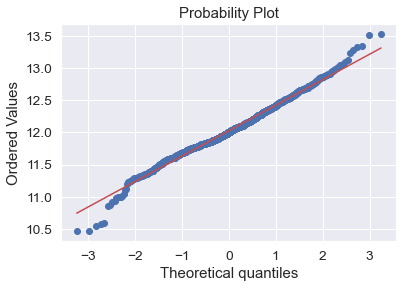

In [28]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
all_data["SalePrice"] = np.log1p(all_data["SalePrice"])

sns.distplot(all_data['SalePrice'] , fit=norm);

# The fitted parameters used by the function
(mu, sigma) = norm.fit(all_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# The distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# The QQ-plot
fig = plt.figure()
res = stats.probplot(all_data['SalePrice'], plot=plt)
plt.show()


In [29]:
### Feature Engineering
ntrain = all_data.shape[0]
Y = all_data[['SalePrice']]
all_data = all_data.reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Entire data size is : {}".format(all_data.shape))

Entire data size is : (1166, 79)


In [30]:
### Imputing Missing Data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.485420
MiscFeature,96.226415
Alley,93.396226
Fence,79.674099
FireplaceQu,47.255575
LotFrontage,18.353345
GarageType,5.488851
GarageYrBlt,5.488851
GarageFinish,5.488851
GarageQual,5.488851


In [31]:
# PoolQC : data description says NA means "No Pool"
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

# MiscFeature : data description says NA means "no misc feature"
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

# Alley : data description says NA means "no alley access"
all_data["Alley"] = all_data["Alley"].fillna("None")

# Fence : data description says NA means "no fence"
all_data["Fence"] = all_data["Fence"].fillna("None")

# FireplaceQu : data description says NA means "no fireplace"
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# Lot Frontage : Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : Missing values are 0 for no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : NaN means that there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

# MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses
# We can fill 0 for the area and None for the type
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

# MSZoning (The general zoning classification) : Fill in missing values with 'RL' which is most common
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

# Utilities : Almost all records are "AllPub" so we drop it
all_data = all_data.drop(['Utilities'], axis=1)

# Functional : Data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

# Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType: They have one NA. We put the most common value there
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

# MSSubClass : Na  means No building class. We replace missing values with None
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [32]:
#Checking for any remaining missing values 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()


,Missing Ratio


Pave    1162
Grvl       4
Name: Street, dtype: int64

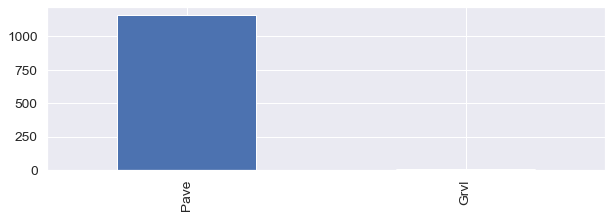

In [33]:
### Deleting Low Variance Data
all_data['Street'].value_counts().plot(kind='bar',figsize=[10,3])
all_data['Street'].value_counts() 

Norm      1153
Feedr        6
Artery       2
RRAe         1
RRNn         1
PosA         1
PosN         1
RRAn         1
Name: Condition2, dtype: int64

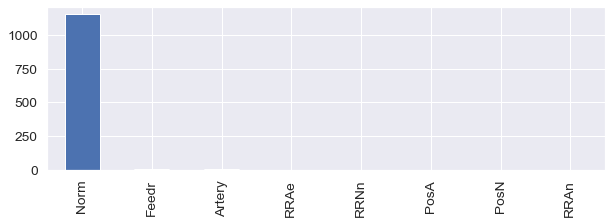

In [34]:
all_data['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
all_data['Condition2'].value_counts() 


CompShg    1143
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

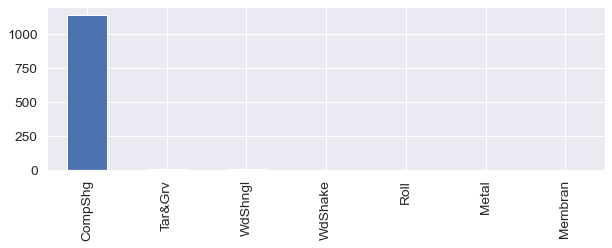

In [35]:
all_data['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
all_data['RoofMatl'].value_counts() 


GasA     1141
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

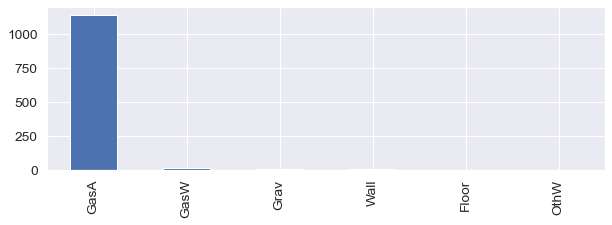

In [36]:
all_data['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
all_data['Heating'].value_counts() #======> Drop feature one Type

In [37]:
all_data = all_data.drop(['Heating','RoofMatl','Condition2','Street'],axis=1)


In [38]:
### Creating New Features
all_data['Age_House']= (all_data['YrSold']-all_data['YearBuilt'])
all_data['Age_House'].describe()


count    1166.000000
mean       36.937393
std        30.180323
min         0.000000
25%         8.000000
50%        36.000000
75%        54.000000
max       135.000000
Name: Age_House, dtype: float64

In [39]:
# The minimum of age of some house is -1 for some reason
Negatif = all_data[all_data['Age_House'] < 0]
Negatif

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age_House


In [40]:
#We change the year sold to 2009 as it the value of 'YearRemodAdd'
all_data.loc[all_data['YrSold'] < all_data['YearBuilt'],'YrSold' ] = 2009
all_data['Age_House']= (all_data['YrSold']-all_data['YearBuilt'])
all_data['Age_House'].describe()

count    1166.000000
mean       36.937393
std        30.180323
min         0.000000
25%         8.000000
50%        36.000000
75%        54.000000
max       135.000000
Name: Age_House, dtype: float64

In [41]:
# TotalBsmtBath : BsmtFullBath + 1/2 BsmtHalfBath
all_data['TotalBsmtBath'] = all_data['BsmtFullBath'] + all_data['BsmtFullBath']*0.5

# TotalBath : FullBath + 1/2 HalfBath
all_data['TotalBath'] = all_data['FullBath'] + all_data['HalfBath']*0.5 

# TotalSA : 1stFlrSF + 2ndFlrSF + TotalBsmtSF
all_data['TotalSA']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']


In [42]:
all_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Age_House,TotalBsmtBath,TotalBath,TotalSA
0,120,RL,24.0,4928,None,IR1,Lvl,Inside,Gtl,NPkVill,...,None,0,2,2007,WD,Normal,31,0.0,2.0,2036
1,20,RL,95.0,15865,None,IR1,Lvl,Inside,Mod,NAmes,...,None,0,10,2007,WD,Normal,37,1.5,2.0,4434
2,60,RL,92.0,9920,None,IR1,Lvl,CulDSac,Gtl,NoRidge,...,None,0,6,2007,WD,Normal,11,1.5,2.5,3130
3,20,RL,105.0,11751,None,IR1,Lvl,Inside,Gtl,NWAmes,...,None,0,1,2010,COD,Normal,33,0.0,2.0,3688
4,20,RL,80.0,16635,None,IR1,Lvl,FR2,Gtl,NWAmes,...,None,0,6,2009,WD,Normal,32,0.0,2.0,3204


In [43]:
### Encoding categorical variables
# Mapping ordinal categories from 0 to N

# Map Prepared according to the data description
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
all_data['ExterQual'] = all_data['ExterQual'].map(bin_map)
all_data['ExterCond'] = all_data['ExterCond'].map(bin_map)
all_data['BsmtCond'] = all_data['BsmtCond'].map(bin_map)
all_data['BsmtQual'] = all_data['BsmtQual'].map(bin_map)
all_data['HeatingQC'] = all_data['HeatingQC'].map(bin_map)
all_data['KitchenQual'] = all_data['KitchenQual'].map(bin_map)
all_data['FireplaceQu'] = all_data['FireplaceQu'].map(bin_map)
all_data['GarageQual'] = all_data['GarageQual'].map(bin_map)
all_data['GarageCond'] = all_data['GarageCond'].map(bin_map)
all_data['CentralAir'] = all_data['CentralAir'].map(bin_map)
all_data['LotShape'] = all_data['LotShape'].map(bin_map)
all_data['BsmtExposure'] = all_data['BsmtExposure'].map(bin_map)
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].map(bin_map)
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
all_data['PavedDrive'] = all_data['PavedDrive'].map(PavedDrive)

In [44]:
#Select categorical features
rest_object_columns = all_data.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_df = pd.get_dummies(all_data, columns=rest_object_columns.columns)
all_data = all_data.drop(columns=rest_object_columns.columns)
all_data = pd.concat([object_columns_df], axis=1,sort=False)
all_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,120,24.0,4928,2,6,5,1976,1976,0.0,2,...,0,0,0,1,0,0,0,0,1,0
1,20,95.0,15865,2,8,6,1970,1970,0.0,4,...,0,0,0,1,0,0,0,0,1,0
2,60,92.0,9920,2,7,5,1996,1997,0.0,4,...,0,0,0,1,0,0,0,0,1,0
3,20,105.0,11751,2,6,6,1977,1977,480.0,2,...,0,0,0,0,0,0,0,0,1,0
4,20,80.0,16635,2,6,7,1977,2000,126.0,4,...,0,0,0,1,0,0,0,0,1,0


In [45]:
# Checking if any Categorical Data Left
all_data.select_dtypes(include=['object']).shape


(1166, 0)

In [46]:
# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(all_data, Y, test_size=0.20, random_state=12345)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(932, 219) (234, 219) (932, 1) (234, 1)


In [47]:
#### Modeling
#Validation function

def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [48]:
# All the regression models to be tried

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso(alpha=0.01,max_iter=100000)))
models.append(('Random Forest Regressor', RandomForestRegressor()))
models.append(('eXtreme Gradient Boost Regressor', GradientBoostingRegressor()))
models.append(("Support Vector Regressor", SVR()))
models.append(("Bayesian Ridge Regressor", BayesianRidge()))
models.append(("XGB Regressor", XGBRegressor()))
models.append(("Elastic Net Regressor", ElasticNet(alpha=0.001,max_iter=10000)))
models.append(("Extra Trees Regressor", ExtraTreesRegressor()))
models.append(("LGBM Regressor", LGBMRegressor()))

# evaluate each model in turn
results = []
names = []


In [49]:
# Getting the rmse score on the train data
for name, model in models:
        score = rmse_cv(model, X_train, Y_train.values.ravel())
        print('\033[4m'+"{}: {:.6f}".format(name,score.mean())+'\033[0m')

Linear Regression: 0.138274
Ridge Regression: 0.127971
Lasso Regression: 0.134277
Random Forest Regressor: 0.146360
eXtreme Gradient Boost Regressor: 0.132492
Support Vector Regressor: 0.208037
Bayesian Ridge Regressor: 0.121752
XGB Regressor: 0.140952
Elastic Net Regressor: 0.119798
Extra Trees Regressor: 0.142189
LGBM Regressor: 0.140066


In [50]:
# getting the r2 score
for name, model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    score=r2_score(Y_test, Y_pred)*100
    print('\033[4m'+"{}: {:.6f}".format(name,score.mean())+'\033[0m')

Linear Regression: 90.839096
Ridge Regression: 90.967088
Lasso Regression: 89.196901
Random Forest Regressor: 89.209238
eXtreme Gradient Boost Regressor: 90.030513
Support Vector Regressor: 75.486588
Bayesian Ridge Regressor: 91.009440
XGB Regressor: 87.390162
Elastic Net Regressor: 91.056754
Extra Trees Regressor: 88.516986
LGBM Regressor: 88.739274


After checking the rmse and the r2 score

Elastic Net Regressor is chosen

In [51]:
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.083
Config: {'alpha': 0.001, 'l1_ratio': 0.68}


In [52]:
els=ElasticNet(alpha=0.001, l1_ratio= 0.5,max_iter=10000)
els.fit(X_train,Y_train)
Y_pred=els.predict(X_test)
Y_train_pred=els.predict(X_train)


In [53]:
print("R2 score for test data : {:.6f}".format(r2_score(Y_test, Y_pred)*100))
print("R2 score for train data : {:.6f}".format(r2_score(Y_train, Y_train_pred)*100))


R2 score for test data : 91.056754
R2 score for train data : 93.561520


The Model does not seems to be overfitted or underfitted

The accuracy score for the regression model is 91%